## 한국 전쟁 중 미군에 의한 폭격 위치

최근 미국 국방부는 시험적으로 군사 정보를 공개하고 있습니다. 그 일환으로 1차대전, 2차대전, 한국 전쟁, 베트남 전쟁에서의 미군의 공중 폭격 좌표들을 공개하였습니다 (https://www.data.mil/s/v2/data-stories-an-overview-of-thor/a100cd16-c2a7-453b-8ea6-45947c1bbc51/). 이 노트북은 그중 한국 전쟁의 폭격 좌표들에 대해 지도를 작성한 것입니다.


In [106]:
# get data from data.mil
# https://insight.livestories.com/dataset/plain/58583a1496a4c60013b78c06
data_source = "data/THOR Korean Bombing Operations (Exeter).csv"

In [107]:
import pandas as pd
rdf = pd.DataFrame.from_csv(data_source)
print(rdf.shape)
rdf.head()

(11052, 31)


,MISSION_NUMBER,OP_ORDER,UNIT,MISSION_DATE,AIRCRAFT_TYPE_MDS,NBR_ATTACK_EFFEC_AIRCRAFT,SORTIE_DUPE,NBR_ABORT_AIRCRAFT,NBR_LOST_AIRCRAFT,TARGET_NAME,...,TOTAL_BOMBLOAD_IN_LBS,TOT,MISSION_TYPE,ALTITUDE_FT,CALLSIGN,BDA,NOSE_FUZE,TAIL_FUZE,CALCULATED_BOMBLOAD_LBS,RECORD_SOURCE
ROW_NUMBER,,,,,,,,,,,,,,,,,,,,,
2,433,174-51,98th Bomb Wing,6/1/51,B-29,1.0,NaN,NaN,NaN,Changdo-ri,...,12000.0,NaN,NaN,19750,NaN,Bombs fell on the east end of the tracks,0.01,Non-delay,12000.0,EXETER
3,433,174-51,307th Bomb Wing,6/1/51,B-29,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.01,Non-delay,4000.0,EXETER
4,433,174-51,307th Bomb Wing,6/1/51,B-29,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,21000 - 22500,NaN,1 aircraft due to a bomb rack malfunction drop...,0.01,Non-delay,8000.0,EXETER
5,433,174-51,98th Bomb Wing,6/1/51,B-29,1.0,NaN,NaN,NaN,Anju,...,16000.0,NaN,NaN,21500,NaN,NaN,0.01,Non-delay,16000.0,EXETER
6,433,174-51,98th Bomb Wing,6/1/51,B-29,1.0,NaN,NaN,NaN,Hamhung,...,16000.0,NaN,NaN,16000,NaN,NaN,0.01,Non-delay,16000.0,EXETER


In [109]:
# remove records without lat/lng
df = rdf[rdf['TGT_LATITUDE_WGS84'].notnull() & rdf['TGT_LONGITUDE_WGS84'].notnull()]
print(df.shape)

(7534, 31)


In [110]:
import re
non_decimal = re.compile(r'[^\d.]+')

df["lon"] = df.TGT_LONGITUDE_WGS84.map(lambda x: float(non_decimal.sub('', x)))
df["lat"] = df.TGT_LATITUDE_WGS84.map(lambda x: float(non_decimal.sub('', x)))
lls = zip(df.lon, df.lat)
from shapely.geometry import Point
geometry = [Point(xy) for xy in lls]

/home/yonghah/anaconda3/envs/geo/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/yonghah/anaconda3/envs/geo/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [111]:
from geopandas import GeoDataFrame

crs = {'datum':'WGS84', 'no_defs':True, 'proj':'aea'}
geo_df = GeoDataFrame(df, crs=crs, geometry=geometry)

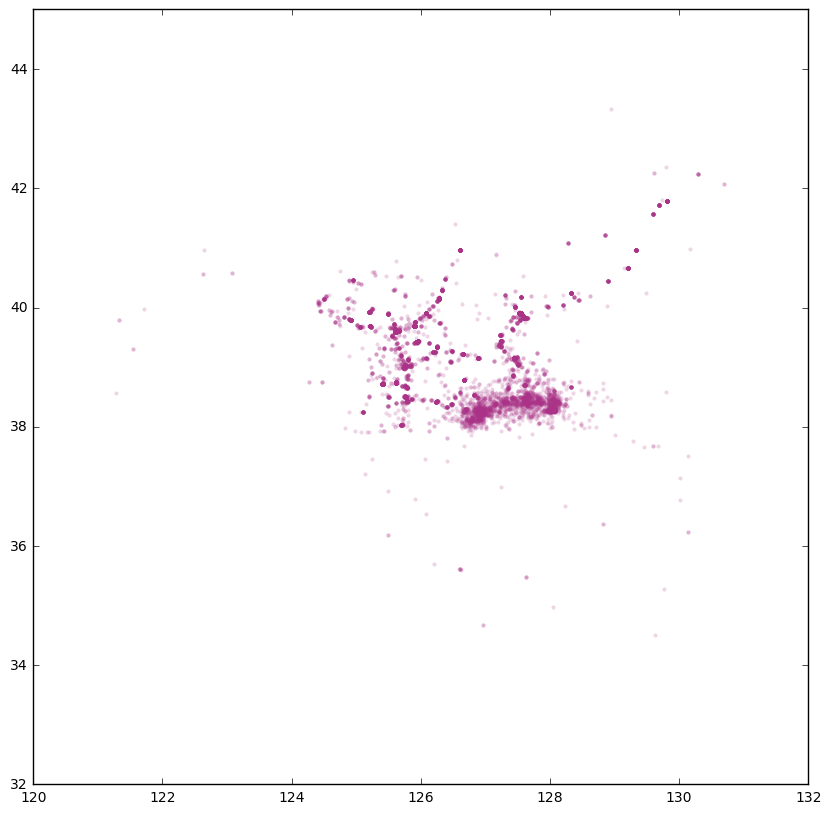

In [112]:
import matplotlib.pyplot as plt

def default_ax(size=10):
    fig, ax = plt.subplots()
    fig.set_size_inches(size, size)
    return ax
ax = default_ax()
ax.set_ylim([32,45])
geo_df.plot(ax=ax, markersize=3, alpha=.2, color='#AA3388', markeredgecolor='none')
plt.show()

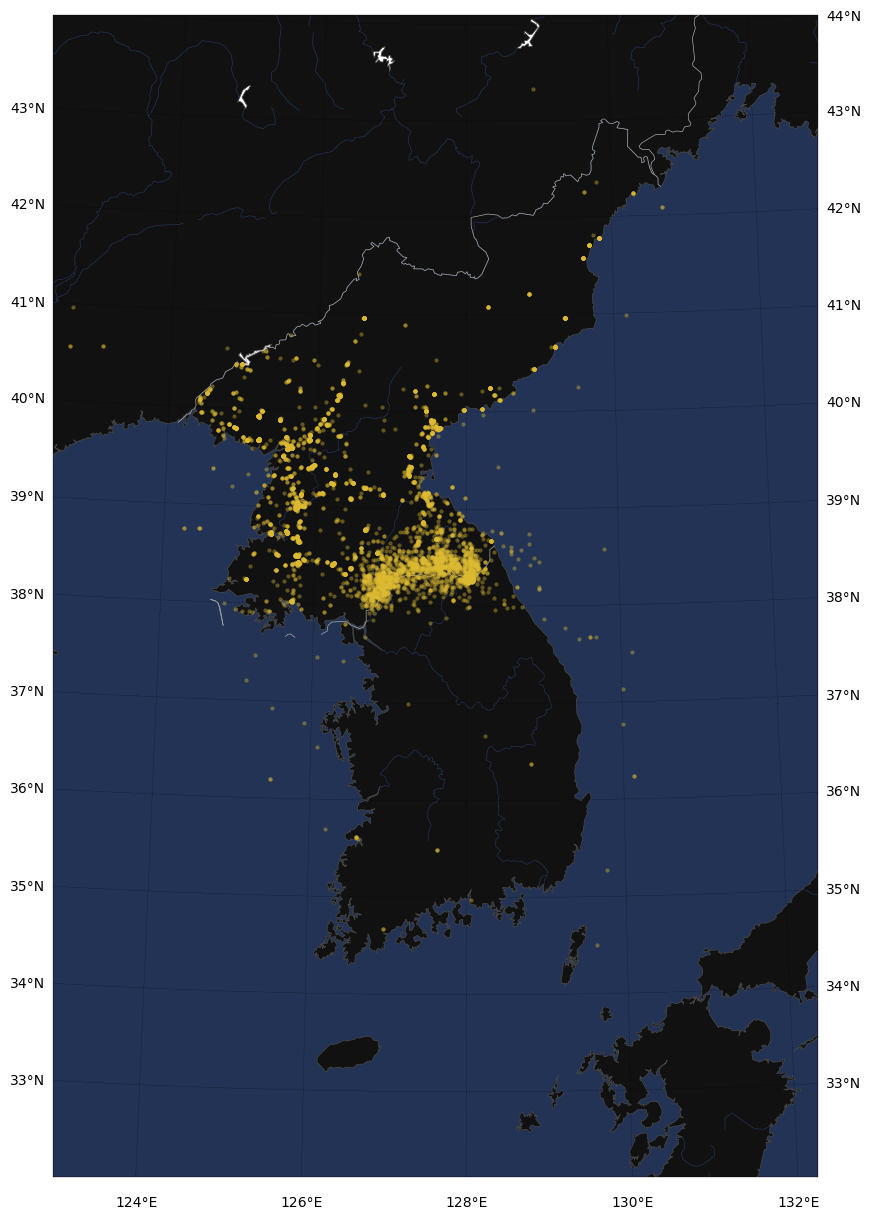

In [114]:
from mpl_toolkits.basemap import Basemap
import numpy as np

water = '#223355'

longitude = 128
latitude = 38
ax = default_ax(size=15)
ax.set_ylim([30,43])

m = Basemap(
        ax=ax,
        projection='aea',
        lon_0=longitude, lat_0=latitude,
        llcrnrlat=latitude - 6.0, urcrnrlat=latitude + 6.0,
        llcrnrlon=longitude - 5.0, urcrnrlon=longitude + 5.0,
        resolution='i'
        )

coast = m.drawcoastlines(linewidth=0.6, color="#444444")
rivers = m.drawrivers(color=water, linewidth=0.5)

bound= m.drawmapboundary(fill_color=water, linewidth=0.2)
countries = m.drawcountries(color="#AAAAAA")
merid = m.drawmeridians(np.arange(-180, 180, 2), labels=[False, False, False, True],linewidth=0.2)
parall = m.drawparallels(np.arange(0, 80), labels=[True, True, False, False],linewidth=0.2)
m.fillcontinents(color='#111111')

for index, site in geo_df.iterrows():
    x, y = m(site.lon, site.lat)  # Translate lat/lon to basemap coordinates
    m.plot(x, y, marker='o', markersize=3.0, alpha=0.4, color="#DDBB33",  markeredgecolor='none')

plt.show()